In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
import seaborn as sns


In [8]:
df_train = pd.read_csv("final_dataframe_train.csv")
df_train = df_train.drop('Unnamed: 0', axis=1)


<AxesSubplot:>

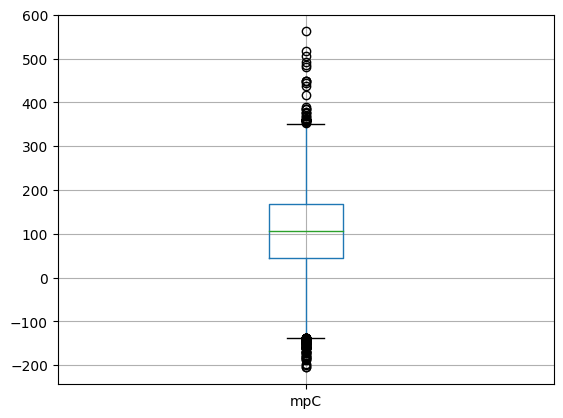

In [3]:
df_train[['mpC']].boxplot()


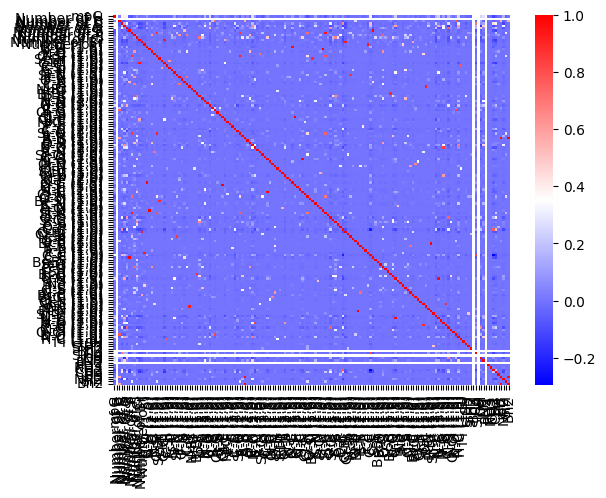

In [3]:
correlation_matrix = df_train.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");


In [4]:
pd.set_option("display.max_column", None)
df_train.head(2)


,name,smiles,mpC,Number of H,Number of B,Number of C,Number of N,Number of O,Number of F,Number of Si,Number of P,Number of S,Number of Cl,Number of Br,Number of I,C-O (1.5),N-H (1.0),P-O (2.0),N-B (1.0),O-Si (1.0),Si-Br (1.0),Si-F (1.0),C-Cl (1.0),C-H (1.0),F-Si (1.0),S-P (1.0),N-N (1.5),Si-N (1.0),P-C (1.0),O-N (1.0),F-C (1.0),C-P (1.0),I-O (1.0),N-Br (1.0),H-O (1.0),B-Br (1.0),C-S (1.0),P-S (2.0),N-N (1.0),N-N (3.0),C-O (2.0),C-B (1.0),B-C (1.0),Cl-O (1.0),B-S (1.0),Si-P (1.0),Cl-C (1.0),N-Cl (1.0),P-F (1.0),F-S (1.0),C-C (2.0),C-N (3.0),Si-O (1.0),S-N (1.0),B-B (1.0),S-C (2.0),O-P (1.0),C-N (1.0),N-O (2.0),C-C (3.0),B-N (1.0),Si-Cl (1.0),C-O (3.0),C-S (1.5),N-O (1.5),Cl-B (1.0),P-N (1.0),O-H (1.0),S-Br (1.0),Cl-P (1.0),O-N (2.0),N-P (2.0),C-P (2.0),O-C (1.5),P-Si (1.0),O-C (3.0),N-C (2.0),S-C (1.5),Cl-N (1.0),C-Si (1.0),O-O (1.0),Br-Si (1.0),C-N (2.0),S-N (1.5),P-Cl (1.0),H-N (1.0),Si-C (1.0),S-S (1.5),O-C (1.0),S-Cl (1.0),S-C (1.0),C-S (2.0),O-P (2.0),C-C (1.0),C-Br (1.0),Cl-Si (1.0),N-Si (1.0),S-P (2.0),O-B (1.0),Br-P (1.0),P-N (2.0),S-F (1.0),F-P (1.0),C-I (1.0),C-C (1.5),C-F (1.0),S-S (1.0),Br-Br (1.0),S-O (1.0),P-O (1.0),O-S (1.0),S-I (1.0),Br-B (1.0),S-O (2.0),C-N (1.5),N-S (1.5),N-I (1.0),I-C (1.0),P-S (1.0),O-S (2.0),N-P (1.0),Br-C (1.0),B-Cl (1.0),O-N (1.5),Cl-S (1.0),B-F (1.0),O-I (1.0),N-N (2.0),P-Br (1.0),Si-Si (1.0),O-C (2.0),N-C (1.5),N-C (3.0),N-O (1.0),F-B (1.0),C-O (1.0),N-S (1.0),O-Cl (1.0),B-O (1.0),N-C (1.0),H-C (1.0),I-I (1.0),SH,SiH3,SiH2,Bh3,CH,SiH4,OH,NH,PH2,PH3,NH3,CH2,CH3,PH,BH,NH2,SiH,Bh2
0,3-i-pr-5-mephenyl-n-me carbamate,O=C(Oc1cc(C)cc(c1)C(C)C)NC,87.0,0,0,12,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0,0,0,0,4,0,0,0,0,0
1,b-2-furylacrylic acid,O=C(O)C=Cc1occc1,133.0,0,0,7,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Let's create the features:
X = df_train.drop(columns=["name", "smiles", "mpC"])
y = df_train["mpC"]


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Créez un modèle de forêt aléatoire
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Entraînez le modèle
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Métrique de performance : Erreur quadratique moyenne négative

# Le score sera négatif, donc prenez l'opposé pour obtenir l'erreur quadratique moyenne positive
rmse_scores = (-scores) ** 0.5

# Calculez la moyenne des scores RMSE
mean_rmse_score = rmse_scores.mean()
print("Moyenne des scores RMSE :", mean_rmse_score)


Moyenne des scores RMSE : 46.21592311237597


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Créer un modèle de forêt aléatoire
model = RandomForestRegressor(random_state=0)

# Définir la grille des hyperparamètres à explorer
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Définir le nombre d'itérations de la recherche
n_iter = 10  # Vous pouvez augmenter cela si nécessaire

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter, scoring='neg_mean_squared_error', cv=5, random_state=0)

# Effectuer la recherche sur les hyperparamètres
random_search.fit(X, y)

# Afficher les meilleurs hyperparamètres et la performance correspondante
print("Meilleurs hyperparamètres trouvés :")
print(random_search.best_params_)
print("RMSE moyen correspondant : ", np.sqrt(-random_search.best_score_))


Meilleurs hyperparamètres trouvés :
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30}
RMSE moyen correspondant :  45.86518053761778


In [8]:
from sklearn.neural_network import MLPRegressor

# Créez un modèle de réseau de neurones
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

# Entraînez le modèle
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Métrique de performance : Erreur quadratique moyenne négative

# Le score sera négatif, donc prenez l'opposé pour obtenir l'erreur quadratique moyenne positive
rmse_scores = (-scores) ** 0.5

# Calculez la moyenne des scores RMSE
mean_rmse_score = rmse_scores.mean()
print("Moyenne des scores RMSE :", mean_rmse_score)


Moyenne des scores RMSE : 45.49644252506192


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Créez un modèle de réseau de neurones
model = MLPRegressor(max_iter=1000)

# Définissez les hyperparamètres que vous souhaitez rechercher
param_dist = {
    'alpha': np.logspace(-6, -2, 5),  # Recherche sur une échelle logarithmique
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Créez un objet RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')

# Entraînez le modèle avec recherche aléatoire
random_search.fit(X, y)

# Affichez les meilleurs paramètres et la meilleure performance
print("Meilleurs paramètres :", random_search.best_params_)
print("Meilleur score RMSE :", (-random_search.best_score_) ** 0.5)


/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer

In [9]:
from sklearn.svm import SVR

# Créez un modèle SVR
model = SVR(kernel='linear', C=1.0)

# Entraînez le modèle
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Métrique de performance : Erreur quadratique moyenne négative

# Le score sera négatif, donc prenez l'opposé pour obtenir l'erreur quadratique moyenne positive
rmse_scores = (-scores) ** 0.5

# Calculez la moyenne des scores RMSE
mean_rmse_score = rmse_scores.mean()
print("Moyenne des scores RMSE :", mean_rmse_score)


Moyenne des scores RMSE : 61.26565285475256


In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
import time

# Créez un modèle SVR
model = SVR(kernel='linear', C=1.0)

# Entraînez le modèle
model.fit(X, y)

# Définissez les hyperparamètres que vous souhaitez optimiser
param_dist = {
    'C': reciprocal(0.1, 100),  # Distribution réciproque pour C
    'kernel': ['linear']  # Types de noyau possibles
}

# Créez un objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVR(),
    param_distributions=param_dist,
    n_iter=10,  # Vous pouvez ajuster ce nombre en fonction de vos ressources
    scoring='neg_mean_squared_error',
    cv=5
)

# Commencez à chronométrer le temps
start_time = time.time()

# Exécutez la recherche aléatoire
random_search.fit(X, y)

# Fin du chronomètre
end_time = time.time()

# Accédez aux meilleurs hyperparamètres et à la meilleure performance
print("Meilleurs hyperparamètres:", random_search.best_params_)
print("Meilleure erreur quadratique moyenne négative:", random_search.best_score_)

# Affichez le temps d'exécution
print(f"Temps d'exécution : {end_time - start_time} secondes")


In [10]:
import xgboost as xgb

# Créez un modèle XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Entraînez le modèle
model.fit(X, y)

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # Métrique de performance : Erreur quadratique moyenne négative

# Le score sera négatif, donc prenez l'opposé pour obtenir l'erreur quadratique moyenne positive
rmse_scores = (-scores) ** 0.5

# Calculez la moyenne des scores RMSE
mean_rmse_score = rmse_scores.mean()
print("Moyenne des scores RMSE :", mean_rmse_score)


Moyenne des scores RMSE : 45.262975671179746


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
import time

# Créez un modèle XGBoost avec des valeurs par défaut
model = xgb.XGBRegressor(objective='reg:squarederror')

# Définissez uniquement les hyperparamètres que vous souhaitez optimiser
param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Créez un objet RandomizedSearchCV
random_search_xgboost = RandomizedSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror'),
    param_distributions=param_dist,
    n_iter=10,  # Vous pouvez ajuster ce nombre en fonction de vos ressources
    scoring='neg_mean_squared_error',
    cv=5
)

# Commencez à chronométrer le temps
start_time = time.time()

# Exécutez la recherche aléatoire
random_search_xgboost.fit(X, y)

# Fin du chronomètre
end_time = time.time()

# Accédez aux meilleurs hyperparamètres et à la meilleure performance
print("Meilleurs hyperparamètres:", random_search_xgboost.best_params_)
print("Meilleure erreur quadratique moyenne négative:", random_search_xgboost.best_score_)

# Affichez le temps d'exécution
print(f"Temps d'exécution : {end_time - start_time} secondes")


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Charger vos données dans un dataframe (assurez-vous que vos données sont correctement formatées)
# Supposons que le dataframe contienne des colonnes 'Feature1', 'Feature2', ..., 'FeatureN', et 'MeltingPoint'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisez les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle
optimizer = keras.optimizers.Adam(learning_rate=0.04)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Évaluez le modèle
loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(loss)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 4s 5ms/step - loss: 4791.9468 - val_loss: 3133.6565
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 3047.4202 - val_loss: 2798.6958
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 2744.8638 - val_loss: 2689.2917
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 2586.6768 - val_loss: 2846.9819
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 2599.1667 - val_loss: 2594.1631
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 2655.5100 - val_loss: 2538.8201
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 2456.5447 - val_loss: 2914.1653
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 2396.7092 - val_loss: 2687.5312
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 2313.6526 - val_loss: 2516.8430
Epoch 10/200
498/498 [===============

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Charger vos données dans un dataframe (assurez-vous que vos données sont correctement formatées)
# Supposons que le dataframe contienne des colonnes 'Feature1', 'Feature2', ..., 'FeatureN', et 'MeltingPoint'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisez les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Évaluez le modèle
loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(mse)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 3s 4ms/step - loss: 4546.6377 - val_loss: 2992.6421
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 2799.2964 - val_loss: 2716.4629
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 2584.0986 - val_loss: 2689.1304
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 2462.7222 - val_loss: 2477.4036
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 2307.8696 - val_loss: 2418.8560
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 2248.7886 - val_loss: 2405.7095
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 2178.7942 - val_loss: 2314.2649
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 2136.5669 - val_loss: 2317.0186
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 2095.4744 - val_loss: 2231.2273
Epoch 10/200
498/498 [===============

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Charger vos données dans un dataframe (assurez-vous que vos données sont correctement formatées)
# Supposons que le dataframe contienne des colonnes 'Feature1', 'Feature2', ..., 'FeatureN', et 'MeltingPoint'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisez les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Évaluez le modèle
loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(mse)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 3s 4ms/step - loss: 5946.0273 - val_loss: 3695.9937
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 3156.6675 - val_loss: 2939.5806
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 2693.9995 - val_loss: 2755.5459
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 2460.8894 - val_loss: 2684.9702
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 2325.9150 - val_loss: 2486.2883
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 2227.6616 - val_loss: 2390.9751
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 2171.3669 - val_loss: 2360.5664
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 2102.9043 - val_loss: 2450.0317
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 2060.1431 - val_loss: 2309.1604
Epoch 10/200
498/498 [===============

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Charger vos données dans un dataframe (assurez-vous que vos données sont correctement formatées)
# Supposons que le dataframe contienne des colonnes 'Feature1', 'Feature2', ..., 'FeatureN', et 'MeltingPoint'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisez les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Évaluez le modèle
loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(mse)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 3s 5ms/step - loss: 17027.8926 - val_loss: 11229.7852
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 7176.8633 - val_loss: 6728.8872
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 5686.8125 - val_loss: 5926.5381
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 5144.2607 - val_loss: 5358.7764
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 4740.6797 - val_loss: 4907.2095
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 4391.9795 - val_loss: 4532.0991
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 4097.7891 - val_loss: 4187.6001
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 3851.7812 - val_loss: 3926.6440
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 3650.8665 - val_loss: 3722.9529
Epoch 10/200
498/498 [=============

KeyboardInterrupt: 

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Charger vos données dans un dataframe (assurez-vous que vos données sont correctement formatées)
# Supposons que le dataframe contienne des colonnes 'Feature1', 'Feature2', ..., 'FeatureN', et 'MeltingPoint'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisez les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Évaluez le modèle
loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(mse)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 2s 4ms/step - loss: 7784.6860 - val_loss: 4892.7949
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 4280.6470 - val_loss: 3827.2000
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 3404.5405 - val_loss: 3235.9014
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 2987.7778 - val_loss: 2987.8345
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 2763.3521 - val_loss: 2859.2288
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 2602.1370 - val_loss: 2742.2678
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 2485.8499 - val_loss: 2657.6582
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 2392.1768 - val_loss: 2564.5901
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 2315.2944 - val_loss: 2567.1421
Epoch 10/200
498/498 [===============

In [20]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad

# Choisissez l'optimiseur que vous souhaitez utiliser
# optimizer = SGD(learning_rate=0.01)  # Stochastic Gradient Descent
# optimizer = RMSprop(learning_rate=0.01)  # RMSprop
optimizer = Adagrad(learning_rate=0.001)  # Adagrad

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(loss)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 9s 4ms/step - loss: 17344.8105 - val_loss: 14597.9932
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 11209.3828 - val_loss: 8882.9463
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 7644.0801 - val_loss: 7214.0903
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 6697.2354 - val_loss: 6744.3379
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 6337.0806 - val_loss: 6485.7778
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 6109.7759 - val_loss: 6300.6050
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 5938.1636 - val_loss: 6150.3853
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 5798.7925 - val_loss: 6023.8232
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 5680.5073 - val_loss: 5916.4761
Epoch 10/200
498/498 [============

In [21]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad

# Choisissez l'optimiseur que vous souhaitez utiliser
# optimizer = SGD(learning_rate=0.01)  # Stochastic Gradient Descent
# optimizer = RMSprop(learning_rate=0.01)  # RMSprop
optimizer = Adagrad(learning_rate=0.01)  # Adagrad

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(loss)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 3s 4ms/step - loss: 4822.3608 - val_loss: 4228.8545
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 3574.8777 - val_loss: 3575.9824
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 3137.8369 - val_loss: 3237.6948
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 2929.7625 - val_loss: 3075.7568
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 2792.6121 - val_loss: 2968.1606
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 2692.3730 - val_loss: 2873.6423
Epoch 7/200
498/498 [==============================] - 2s 5ms/step - loss: 2611.6765 - val_loss: 2826.1545
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 2541.3591 - val_loss: 2778.3828
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 2486.9338 - val_loss: 2719.4036
Epoch 10/200
498/498 [===============

In [22]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad

# Choisissez l'optimiseur que vous souhaitez utiliser
# optimizer = SGD(learning_rate=0.01)  # Stochastic Gradient Descent
optimizer = RMSprop(learning_rate=0.01)  # RMSprop


# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(loss)

print("RMSE:", rmse)


Epoch 1/200
498/498 [==============================] - 3s 4ms/step - loss: 4047.8333 - val_loss: 2893.4678
Epoch 2/200
498/498 [==============================] - 2s 4ms/step - loss: 2930.9836 - val_loss: 3036.1775
Epoch 3/200
498/498 [==============================] - 2s 4ms/step - loss: 2645.3828 - val_loss: 2802.2395
Epoch 4/200
498/498 [==============================] - 2s 4ms/step - loss: 2464.6372 - val_loss: 2605.3848
Epoch 5/200
498/498 [==============================] - 2s 4ms/step - loss: 2353.8926 - val_loss: 3243.0496
Epoch 6/200
498/498 [==============================] - 2s 4ms/step - loss: 2267.4326 - val_loss: 3120.6077
Epoch 7/200
498/498 [==============================] - 2s 4ms/step - loss: 2230.1331 - val_loss: 2296.7722
Epoch 8/200
498/498 [==============================] - 2s 4ms/step - loss: 2132.8857 - val_loss: 2272.1550
Epoch 9/200
498/498 [==============================] - 2s 4ms/step - loss: 2100.4126 - val_loss: 2276.1553
Epoch 10/200
498/498 [===============

In [27]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad

# Choisissez l'optimiseur que vous souhaitez utiliser
# optimizer = SGD(learning_rate=0.01)  # Stochastic Gradient Descent
# optimizer = RMSprop(learning_rate=0.01)  # RMSprop
optimizer = Adagrad(learning_rate=0.001)  # Adagrad

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(loss)

print("RMSE:", rmse)


Epoch 1/1000
125/125 [==============================] - 1s 6ms/step - loss: 18793.9727 - val_loss: 18446.8555
Epoch 2/1000
125/125 [==============================] - 1s 5ms/step - loss: 17299.2285 - val_loss: 16579.7676
Epoch 3/1000
125/125 [==============================] - 1s 4ms/step - loss: 15211.9199 - val_loss: 14344.5596
Epoch 4/1000
125/125 [==============================] - 1s 4ms/step - loss: 12976.0957 - val_loss: 12191.9766
Epoch 5/1000
125/125 [==============================] - 1s 4ms/step - loss: 10973.5898 - val_loss: 10441.6230
Epoch 6/1000
125/125 [==============================] - 1s 4ms/step - loss: 9438.0830 - val_loss: 9209.6846
Epoch 7/1000
125/125 [==============================] - 1s 4ms/step - loss: 8394.2773 - val_loss: 8422.1631
Epoch 8/1000
125/125 [==============================] - 1s 4ms/step - loss: 7733.0425 - val_loss: 7933.2891
Epoch 9/1000
125/125 [==============================] - 1s 4ms/step - loss: 7311.0508 - val_loss: 7615.2847
Epoch 10/1000
125/

In [39]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

optimizer = Adam(learning_rate=0.005)  # Adam

# Créez votre modèle de régression
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=1000, batch_size=512, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)

rmse = np.sqrt(loss)

print("RMSE:", rmse)


Epoch 1/1000
32/32 [==============================] - 2s 27ms/step - loss: 8590.3066 - val_loss: 4618.2314
Epoch 2/1000
32/32 [==============================] - 1s 19ms/step - loss: 4071.4854 - val_loss: 3669.0354
Epoch 3/1000
32/32 [==============================] - 1s 21ms/step - loss: 3122.9165 - val_loss: 2990.2864
Epoch 4/1000
32/32 [==============================] - 1s 20ms/step - loss: 2532.9058 - val_loss: 2891.0901
Epoch 5/1000
32/32 [==============================] - 1s 23ms/step - loss: 2352.3887 - val_loss: 2558.8389
Epoch 6/1000
32/32 [==============================] - 1s 24ms/step - loss: 2268.2222 - val_loss: 2531.5515
Epoch 7/1000
32/32 [==============================] - 1s 28ms/step - loss: 2133.4099 - val_loss: 2284.1504
Epoch 8/1000
32/32 [==============================] - 1s 20ms/step - loss: 2109.4089 - val_loss: 2220.5923
Epoch 9/1000
32/32 [==============================] - 1s 19ms/step - loss: 2021.8350 - val_loss: 2301.0081
Epoch 10/1000
32/32 [================

KeyboardInterrupt: 

In [41]:
from tensorflow.keras.optimizers import RMSprop

# Choisissez l'optimiseur RMSprop avec un learning rate
optimizer = RMSprop(learning_rate=0.001)

# Créez votre modèle de régression avec des couches Conv1D
model = keras.Sequential()
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
rmse = np.sqrt(loss)
print("RMSE:", rmse)


Epoch 1/100
32/32 [==============================] - 11s 196ms/step - loss: 8650.5840 - val_loss: 5477.4302
Epoch 2/100
32/32 [==============================] - 83s 3s/step - loss: 4798.6538 - val_loss: 4557.0996
Epoch 3/100
32/32 [==============================] - 6s 190ms/step - loss: 3923.2996 - val_loss: 3598.5273
Epoch 4/100
32/32 [==============================] - 5s 156ms/step - loss: 3535.8748 - val_loss: 3352.5701
Epoch 5/100
32/32 [==============================] - 5s 167ms/step - loss: 3335.4060 - val_loss: 3516.1731
Epoch 6/100
32/32 [==============================] - 7s 235ms/step - loss: 3200.3135 - val_loss: 3047.9924
Epoch 7/100
32/32 [==============================] - 6s 181ms/step - loss: 3155.5757 - val_loss: 3029.2061
Epoch 8/100
32/32 [==============================] - 5s 165ms/step - loss: 3090.0005 - val_loss: 3122.6899
Epoch 9/100
32/32 [==============================] - 5s 168ms/step - loss: 3025.9790 - val_loss: 2864.4084
Epoch 10/100
32/32 [==================

KeyboardInterrupt: 

In [42]:
from tensorflow.keras.optimizers import Adagrad

# Choisissez l'optimiseur Adagrad avec un learning rate
optimizer = Adagrad(learning_rate=0.01)

# Créez votre modèle de régression avec des couches LSTM
model = keras.Sequential()
model.add(layers.LSTM(128, input_shape=(X_train.shape[1], 1)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
rmse = np.sqrt(loss)
print("RMSE:", rmse)


Epoch 1/50
32/32 [==============================] - 68s 911ms/step - loss: 10938.5195 - val_loss: 8681.7393
Epoch 2/50
 5/32 [===>..........................] - ETA: 23s - loss: 8796.5215

In [4]:
# Utilisez l'optimiseur Adam avec le learning rate par défaut

# Créez votre modèle de régression avec une architecture de Transformer
from tensorflow.keras.layers import Transformer

model = keras.Sequential()
model.add(Transformer(num_layers=4, d_model=64, num_heads=4, input_shape=(X_train.shape[1], 1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # Couche de sortie avec une seule sortie pour la prédiction de la température de fusion

# Compilez le modèle avec l'optimiseur choisi
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraînez le modèle
model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
rmse = np.sqrt(loss)
print("RMSE:", rmse)


2023-10-30 00:31:28.111384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 00:31:30.492873: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-30 00:31:30.861112: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-30 00:31:30.861153: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

ImportError: cannot import name 'Transformer' from 'tensorflow.keras.layers' (/home/guillaumelewagon/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/keras/api/_v2/keras/layers/__init__.py)

In [6]:
from tensorflow.keras.optimizers import RMSprop

# Choisissez l'optimiseur RMSprop avec un learning rate
optimizer = RMSprop(learning_rate=0.001)

# Créez deux branches identiques pour le réseau de neurones siamois
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))
shared_layer = layers.Dense(512, activation='relu')(input_layer)
output_layer = layers.Dense(1)(shared_layer)

# Créez le modèle siamois en combinant les deux branches
siamese_model = Model(inputs=input_layer, outputs=output_layer)

# Compilez le modèle avec l'optimiseur choisi
siamese_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entraînez le modèle
siamese_model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_test, y_test))

loss = siamese_model.evaluate(X_test, y_test)
rmse = np.sqrt(loss)
print("RMSE:", rmse)


NameError: name 'X_train' is not defined

In [ ]:
#This model work but improve the learning rate and number of epochs


In [ ]:
"""    Réseaux de Neurones Convolutifs (CNN) : Les CNN sont généralement utilisés pour la vision par
ordinateur, mais ils peuvent également être appliqués à d'autres types de données sous forme de
séquences (par exemple, traitement du langage naturel avec des embeddings de mots).
Ils sont particulièrement bons pour extraire des caractéristiques locales à partir des données.

    Réseaux de Neurones Récurents (RNN) : Les RNN sont couramment utilisés pour les données séquentielles, telles que la série temporelle ou le traitement du langage naturel. Les LSTM (Long Short-Term Memory) et les GRU (Gated Recurrent Unit) sont des variantes populaires des RNN qui peuvent capturer des dépendances à long terme dans les données séquentielles.

    Réseaux de Neurones à Mémoire à Court Terme (LSTM) : Les LSTM sont spécialement conçus pour traiter les données séquentielles et sont capables de gérer les dépendances à long terme. Ils sont souvent utilisés dans les applications de traitement du langage naturel et de série temporelle.

    Réseaux de Neurones Convolutifs 1D (1D CNN) : Les CNN 1D sont adaptés aux données séquentielles unidimensionnelles, telles que les séquences de texte ou de temps. Ils sont utiles pour extraire des caractéristiques à partir de séquences.

    Réseaux de Neurones à Convolution 2D (2D CNN) : Les CNN 2D sont couramment utilisés pour la vision par ordinateur, mais peuvent également être appliqués à d'autres données sous forme d'images. Ils sont excellents pour la détection de motifs spatiaux dans les images.

    Réseaux de Neurones Récurents Bidirectionnels (Bi-LSTM, Bi-GRU) : Ces modèles permettent de prendre en compte les informations passées et futures lors de la prédiction. Ils sont utiles pour les tâches de séquence où les informations des deux directions sont importantes.

    Transformers : Les modèles Transformer sont devenus très populaires pour le traitement du langage naturel, mais ils peuvent également être appliqués à d'autres types de données séquentielles. Ils sont particulièrement adaptés aux tâches de modélisation de langage et de traduction.

    Réseaux de Neurones Résiduels (ResNet) : Les ResNets sont souvent utilisés pour des tâches de vision par ordinateur. Ils utilisent des connexions résiduelles pour faciliter l'entraînement de réseaux plus profonds.

    Réseaux de Neurones Siameses : Ces modèles sont utilisés pour des tâches de comparaison, de similarité ou de recherche d'anomalies. Ils utilisent deux branches de réseau pour comparer des paires de données.

    Réseaux de Neurones Génératifs (GAN, VAE) : Les GAN (Generative Adversarial Networks) et les VAE (Variational Autoencoders) sont utilisés pour la génération de données, la synthèse d'images et la création de contenu."""


In [9]:
mse = model.evaluate(X_test, y_test)

# Calcul de la RMSE en prenant la racine carrée de la MSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)


125/125 [==============================] - 0s 3ms/step - loss: 2564.5828
RMSE: 50.641709723032406


125/125 [==============================] - 0s 2ms/step
[[256.9517  ]
 [ 94.37111 ]
 [160.5401  ]
 ...
 [ 13.007814]
 [187.63498 ]
 [121.90892 ]]
